In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
rar_file_path = '/content/train.rar'

In [4]:
extract_dir = '/content'

In [5]:
!pip install rarfile

import rarfile
# Now, let's extract the contents
with rarfile.RarFile(rar_file_path, 'r') as rf:
    rf.extractall(extract_dir)

print(f"Extracted to: {extract_dir}")

Extracted to: /content


In [3]:
import os
import cv2

# Define the categories
categories=['small_Benign','small_Malignant']

data = []

# Loop through each category
for category in categories:
    path = os.path.join('train', category)  # Assuming the folders are in the root of your Google Drive
    label = categories.index(category)

    # Loop through each file in the category folder
    for file in os.listdir(path):
        img_path = os.path.join(path, file)

        # Read the image
        img = cv2.imread(img_path)

        # Resize the image to 224x224
        try:
            img = cv2.resize(img, (224, 224))
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            continue

        # Append the image and its label to the data list
        data.append([img, label])

# Now you have a list 'data' containing image-label pairs
# Each element of 'data' is a list [image, label], where 'image' is a numpy array and 'label' is an integer
# You can further process this data for your machine learning model


In [4]:
#how many images inthe dataset
len(data)

2013

In [5]:
import random
random.shuffle(data)

In [6]:
#split the input
X=[]
Y=[]
for feature,label in data:
    X.append(feature)
    Y.append(label)

In [7]:
X

[array([[[212, 205, 226],
         [210, 203, 224],
         [209, 202, 223],
         ...,
         [147, 146, 178],
         [144, 143, 175],
         [141, 140, 172]],
 
        [[211, 204, 225],
         [210, 203, 224],
         [209, 202, 223],
         ...,
         [147, 146, 178],
         [143, 142, 174],
         [141, 140, 172]],
 
        [[210, 203, 224],
         [208, 201, 222],
         [207, 200, 221],
         ...,
         [147, 146, 178],
         [143, 142, 174],
         [140, 139, 171]],
 
        ...,
 
        [[159, 158, 200],
         [144, 146, 186],
         [137, 137, 177],
         ...,
         [137, 124, 162],
         [131, 118, 156],
         [127, 114, 152]],
 
        [[181, 182, 226],
         [162, 166, 207],
         [144, 146, 187],
         ...,
         [128, 115, 153],
         [131, 118, 156],
         [134, 121, 159]],
 
        [[173, 176, 220],
         [177, 180, 224],
         [176, 180, 221],
         ...,
         [ 88,  75, 113],
  

In [8]:
from collections import Counter

label_counts = Counter(Y)
print(label_counts)

Counter({1: 1012, 0: 1001})


In [9]:
len(X),len(Y)

(2013, 2013)

In [10]:
import numpy as np
#convert numpy array (x 2d and y 1d)
X=np.array(X)
Y=np.array(Y)

In [34]:
X

array([[[[164, 161, 176],
         [164, 161, 176],
         [163, 160, 176],
         ...,
         [149, 153, 171],
         [149, 153, 171],
         [149, 153, 171]],

        [[163, 160, 175],
         [163, 160, 175],
         [163, 160, 176],
         ...,
         [149, 153, 171],
         [149, 153, 171],
         [149, 153, 171]],

        [[162, 159, 175],
         [162, 159, 175],
         [162, 159, 175],
         ...,
         [149, 153, 171],
         [149, 153, 171],
         [149, 153, 171]],

        ...,

        [[149, 153, 171],
         [149, 153, 171],
         [148, 152, 170],
         ...,
         [160, 152, 169],
         [161, 153, 170],
         [161, 153, 170]],

        [[149, 153, 171],
         [148, 152, 170],
         [148, 152, 170],
         ...,
         [161, 153, 170],
         [163, 153, 170],
         [163, 153, 170]],

        [[149, 153, 171],
         [148, 152, 170],
         [148, 152, 170],
         ...,
         [161, 153, 170],
        

In [11]:
X.shape

(2013, 224, 224, 3)

In [12]:
X.ndim

4

In [13]:
#scaler :min max scaler
#RGB (0-255,0-255,0-255)
X=X/255

In [38]:
X

array([[[[0.64313725, 0.63137255, 0.69019608],
         [0.64313725, 0.63137255, 0.69019608],
         [0.63921569, 0.62745098, 0.69019608],
         ...,
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824]],

        [[0.63921569, 0.62745098, 0.68627451],
         [0.63921569, 0.62745098, 0.68627451],
         [0.63921569, 0.62745098, 0.69019608],
         ...,
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824]],

        [[0.63529412, 0.62352941, 0.68627451],
         [0.63529412, 0.62352941, 0.68627451],
         [0.63529412, 0.62352941, 0.68627451],
         ...,
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824]],

        ...,

        [[0.58431373, 0.6       , 0.67058824],
         [0.58431373, 0.6       , 0.67058824]

In [14]:
X

array([[[[0.83137255, 0.80392157, 0.88627451],
         [0.82352941, 0.79607843, 0.87843137],
         [0.81960784, 0.79215686, 0.8745098 ],
         ...,
         [0.57647059, 0.57254902, 0.69803922],
         [0.56470588, 0.56078431, 0.68627451],
         [0.55294118, 0.54901961, 0.6745098 ]],

        [[0.82745098, 0.8       , 0.88235294],
         [0.82352941, 0.79607843, 0.87843137],
         [0.81960784, 0.79215686, 0.8745098 ],
         ...,
         [0.57647059, 0.57254902, 0.69803922],
         [0.56078431, 0.55686275, 0.68235294],
         [0.55294118, 0.54901961, 0.6745098 ]],

        [[0.82352941, 0.79607843, 0.87843137],
         [0.81568627, 0.78823529, 0.87058824],
         [0.81176471, 0.78431373, 0.86666667],
         ...,
         [0.57647059, 0.57254902, 0.69803922],
         [0.56078431, 0.55686275, 0.68235294],
         [0.54901961, 0.54509804, 0.67058824]],

        ...,

        [[0.62352941, 0.61960784, 0.78431373],
         [0.56470588, 0.57254902, 0.72941176]

In [15]:
from collections import Counter

label_counts = Counter(Y)
print(label_counts)

Counter({1: 1012, 0: 1001})


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
x_train.shape

(1409, 224, 224, 3)

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# CNN Model building
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                        activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
#create a object of early stopping class
cb=EarlyStopping(
    monitor="val_loss",# val loss validation loss means testing error (testing loss)  # if it is accuary it will stop at accuarcay
    min_delta=0.00001,  #delta min learning rate #lyma value of early stopping #fixing weight and bias
    patience=20, #not stoping immediately
    verbose=1,  #it show me where  the early stopping has taken place
    mode="auto",
    baseline=None, #nueral network decided automatic
    restore_best_weights=False #default true but false it will assign first weights

)

In [21]:
trained_model= model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test))

Epoch 1/8
45/45 [==============================] - 92s 2s/step - loss: 6.6474 - accuracy: 0.5295 - val_loss: 0.6153 - val_accuracy: 0.7434
Epoch 2/8
45/45 [==============================] - 90s 2s/step - loss: 0.4839 - accuracy: 0.7615 - val_loss: 0.4574 - val_accuracy: 0.7434
Epoch 3/8
45/45 [==============================] - 89s 2s/step - loss: 0.4260 - accuracy: 0.7850 - val_loss: 0.5307 - val_accuracy: 0.7748
Epoch 4/8
45/45 [==============================] - 90s 2s/step - loss: 0.4322 - accuracy: 0.7850 - val_loss: 0.4358 - val_accuracy: 0.7732
Epoch 5/8
45/45 [==============================] - 98s 2s/step - loss: 0.3882 - accuracy: 0.8062 - val_loss: 0.4818 - val_accuracy: 0.7897
Epoch 6/8
45/45 [==============================] - 92s 2s/step - loss: 0.3826 - accuracy: 0.8219 - val_loss: 0.4130 - val_accuracy: 0.7732
Epoch 7/8
45/45 [==============================] - 91s 2s/step - loss: 0.3844 - accuracy: 0.8254 - val_loss: 0.4466 - val_accuracy: 0.8030
Epoch 8/8
45/45 [==========

In [22]:
print("print train_loss and Train_accuarcay",model.evaluate(x_train,y_train))
print("print test_loss and Test_accuarcay",model.evaluate(x_test,y_test))

45/45 [==============================] - 21s 471ms/step - loss: 0.4364 - accuracy: 0.8290
print train_loss and Train_accuarcay [0.43643471598625183, 0.8289567232131958]
19/19 [==============================] - 7s 364ms/step - loss: 0.5605 - accuracy: 0.7815
print test_loss and Test_accuarcay [0.5604840517044067, 0.7814569473266602]


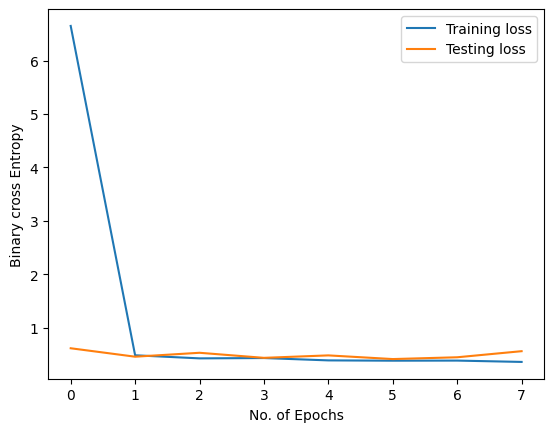

In [23]:
import matplotlib.pyplot as plt
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy')
plt.legend()
plt.show()

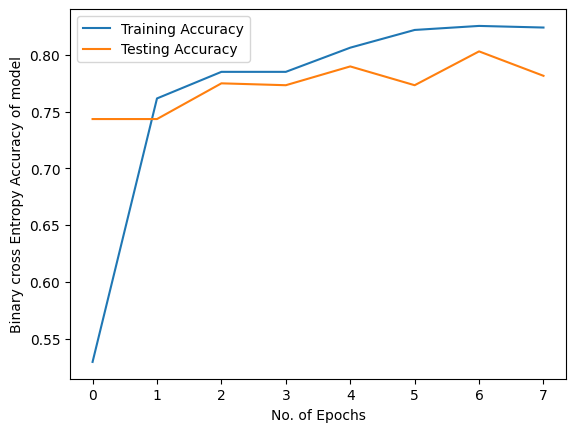

In [24]:
#visulisation of training and testing accuracy
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy Accuracy of model')
plt.legend()
plt.show()

In [25]:
y_pred=model.predict(x_test)
y_pred

19/19 [==============================] - 8s 427ms/step


array([[0.90922564],
       [0.99942183],
       [0.53126115],
       [0.935811  ],
       [0.73282015],
       [0.96641225],
       [0.65506583],
       [0.50588435],
       [0.8757396 ],
       [0.9987274 ],
       [0.9942023 ],
       [0.81549275],
       [0.18306163],
       [0.95397586],
       [0.7494218 ],
       [0.8914722 ],
       [0.08084126],
       [0.01901039],
       [0.04512943],
       [0.9008452 ],
       [0.93902993],
       [0.90158534],
       [0.05662511],
       [0.05245988],
       [0.5244969 ],
       [0.93021023],
       [0.99961925],
       [0.20291236],
       [0.94938964],
       [0.13086268],
       [0.28713965],
       [0.10648526],
       [0.42830572],
       [0.7556433 ],
       [0.81709653],
       [0.9107904 ],
       [0.5691644 ],
       [0.85233945],
       [0.07059799],
       [0.9536174 ],
       [0.3436051 ],
       [0.9068454 ],
       [0.88921237],
       [0.7153883 ],
       [0.89819163],
       [0.15413232],
       [0.09304758],
       [0.861

In [26]:
y_pred=model.predict(x_test).round(2)
y_pred

19/19 [==============================] - 8s 384ms/step


array([[0.91],
       [1.  ],
       [0.53],
       [0.94],
       [0.73],
       [0.97],
       [0.66],
       [0.51],
       [0.88],
       [1.  ],
       [0.99],
       [0.82],
       [0.18],
       [0.95],
       [0.75],
       [0.89],
       [0.08],
       [0.02],
       [0.05],
       [0.9 ],
       [0.94],
       [0.9 ],
       [0.06],
       [0.05],
       [0.52],
       [0.93],
       [1.  ],
       [0.2 ],
       [0.95],
       [0.13],
       [0.29],
       [0.11],
       [0.43],
       [0.76],
       [0.82],
       [0.91],
       [0.57],
       [0.85],
       [0.07],
       [0.95],
       [0.34],
       [0.91],
       [0.89],
       [0.72],
       [0.9 ],
       [0.15],
       [0.09],
       [0.86],
       [1.  ],
       [0.07],
       [0.7 ],
       [0.28],
       [0.58],
       [1.  ],
       [0.99],
       [0.66],
       [0.94],
       [1.  ],
       [0.26],
       [0.71],
       [0.87],
       [1.  ],
       [1.  ],
       [0.64],
       [0.88],
       [0.04],
       [0.

In [27]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74       314
           1       0.70      0.96      0.81       290

    accuracy                           0.78       604
   macro avg       0.82      0.79      0.78       604
weighted avg       0.83      0.78      0.77       604



In [30]:
print(confusion_matrix(y_test,y_pred))

[[192 122]
 [ 11 279]]


In [31]:
import pickle

In [32]:
pickle.dump(model,open('model78.sav','wb'))

In [41]:
import cv2
import numpy as np

input_image = cv2.imread('1.jpg')

# cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255
print(input_image_scaled)

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
print(input_image_reshaped)
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

[[[0.56470588 0.54901961 0.70980392]
  [0.6        0.58431373 0.74509804]
  [0.60392157 0.58823529 0.74901961]
  ...
  [0.61568627 0.61176471 0.76862745]
  [0.60392157 0.6        0.75686275]
  [0.59215686 0.58823529 0.74509804]]

 [[0.63921569 0.62352941 0.78431373]
  [0.6745098  0.65882353 0.81960784]
  [0.67843137 0.6627451  0.82352941]
  ...
  [0.69803922 0.69411765 0.85098039]
  [0.68627451 0.68235294 0.83921569]
  [0.6745098  0.67058824 0.82745098]]

 [[0.61960784 0.60784314 0.76078431]
  [0.6627451  0.65098039 0.80392157]
  [0.66666667 0.65490196 0.80784314]
  ...
  [0.68235294 0.67843137 0.83529412]
  [0.67058824 0.66666667 0.82352941]
  [0.65882353 0.65490196 0.81176471]]

 ...

 [[0.60392157 0.61568627 0.7372549 ]
  [0.6627451  0.6745098  0.79607843]
  [0.6745098  0.68235294 0.81568627]
  ...
  [0.69411765 0.69019608 0.84313725]
  [0.68235294 0.67843137 0.83137255]
  [0.67843137 0.6745098  0.82745098]]

 [[0.6        0.61176471 0.73333333]
  [0.65490196 0.66666667 0.78823529]


In [42]:
if input_prediction > 0.5:

    print("Benign")
else:
    print('Malignant')

Benign


[[[0.56470588 0.54901961 0.70980392]
  [0.6        0.58431373 0.74509804]
  [0.60392157 0.58823529 0.74901961]
  ...
  [0.61568627 0.61176471 0.76862745]
  [0.60392157 0.6        0.75686275]
  [0.59215686 0.58823529 0.74509804]]

 [[0.63921569 0.62352941 0.78431373]
  [0.6745098  0.65882353 0.81960784]
  [0.67843137 0.6627451  0.82352941]
  ...
  [0.69803922 0.69411765 0.85098039]
  [0.68627451 0.68235294 0.83921569]
  [0.6745098  0.67058824 0.82745098]]

 [[0.61960784 0.60784314 0.76078431]
  [0.6627451  0.65098039 0.80392157]
  [0.66666667 0.65490196 0.80784314]
  ...
  [0.68235294 0.67843137 0.83529412]
  [0.67058824 0.66666667 0.82352941]
  [0.65882353 0.65490196 0.81176471]]

 ...

 [[0.60392157 0.61568627 0.7372549 ]
  [0.6627451  0.6745098  0.79607843]
  [0.6745098  0.68235294 0.81568627]
  ...
  [0.69411765 0.69019608 0.84313725]
  [0.68235294 0.67843137 0.83137255]
  [0.67843137 0.6745098  0.82745098]]

 [[0.6        0.61176471 0.73333333]
  [0.65490196 0.66666667 0.78823529]
